# Lesson 23: More plotting with Altair

(c) 2018 Justin Bois. With the exception of pasted graphics, where the source is noted, this work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

This document was prepared at [Caltech](http://www.caltech.edu) with financial support from the [Donna and Benjamin M. Rosen Bioengineering Center](http://rosen.caltech.edu).

<img src="caltech_rosen.png">

*This lesson was generated from a Jupyter notebook.  You can download the notebook [here](l23_more_plotting_with_altair.ipynb).*

<br /> <br />

In [1]:
import numpy as np
import pandas as pd
import altair as alt

import bootcamp_utils

In this lesson, we will learn about some fine-tuning with Altair, and also how to make some important kinds of plots. For this lesson, we will use [the frog tongue data set from Kleinteich and Gorb](https://doi.org/10.1038/srep05225) that we used in [lesson 21](l21_practice_with_pandas.html). Let's get the data frame loaded in so we can be on our way.

In [2]:
df = pd.read_csv('data/frog_tongue_adhesion.csv', comment='#')

# Have a look so we remember
df.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


## More control without shortcuts

We'll start by making a scatter plot of adhesive force versus impact force as we did in the previous lesson.

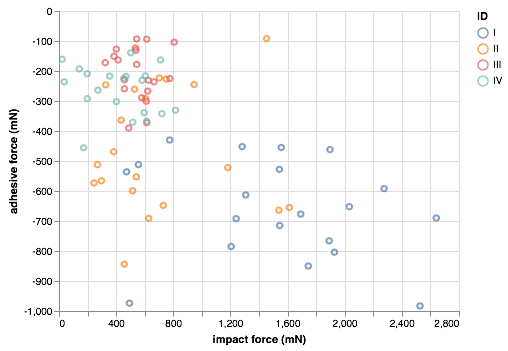

In [3]:
alt.Chart(df
    ).mark_point(
    ).encode(
        x='impact force (mN):Q',
        y='adhesive force (mN):Q',
        color='ID:N',
    ).interactive()

When we made the plot above, we used shortcuts for the encoding channels. That is, we passed the string `'impact force (mN):Q'` for the `x` channel. The shorthand is really convenient, but if we want more control over the plot, we should use the class associated with a given channel. You can refer again to the [Altair docs]([Altair docs](https://altair-viz.github.io/user_guide/encoding.html#encoding-channels) for the classes associated with each encoding channel. The class for the `x` channel is `alt.X`. `alt.X()` can take make kwargs, and you can use these to specify properties about how data are mapped to visual features on the plot. Similarly, `alt.Color()` enables you to set properties about coloring. 

To see how these work, let's make the same plot, except with the x-axis on a logarithmic scale and with the title of the legend being changed to "Frog ID."

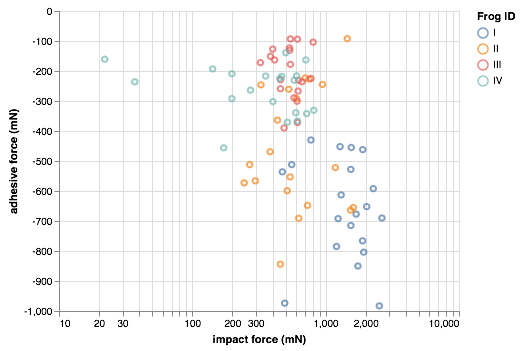

In [4]:
alt.Chart(df
    ).mark_point(
    ).encode(
        x=alt.X('impact force (mN)',
                type='quantitative',
                scale=alt.Scale(type='log')),
        y=alt.Y('adhesive force (mN)',
                type='quantitative'),
        color=alt.Color('ID:N',
                        title='Frog ID')
    ).interactive()

## A watch-out about column names

Because of [Vega's specifications](https://vega.github.io/vega-lite/docs/field.html), Altair will not interpret brackets, dots, quotes, or percent signs in field names. That means that if you have a column in a data frame that has one of those characters, you will need to change the name of the column so that it does not have those characters. For example, you might have a column representing the concentration of a chemical, like `[IPTG (mM)]`. In this case, you can use
```python
df = df.rename(columns={'[IPTG (mM)]': 'iptg conc (mM)'})
```
to rename the appropriate column. You can then proceed to use the data frame in Altair, but you will need to be explicit about the axis label, encoding with something like
```python
alt.X('iptg conc (mM)', title='[IPTG (mM)]')
```

## Top-level properties 

We may also want to set some global, or top-level, properties of the plot, such as its height and width (which are specified in units of pixels), label font size and weight, etc. These things can be adjusted using the `configure_*()` methods (see [Altair docs](https://altair-viz.github.io/user_guide/configuration.html)). Again, let's learn by example.

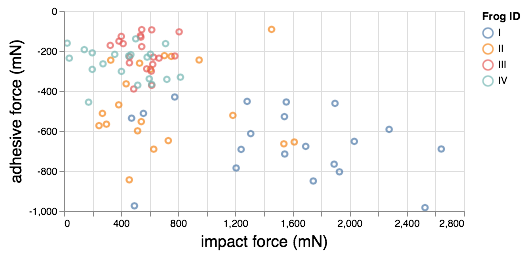

In [5]:
alt.Chart(df
    ).mark_point(
    ).encode(
        x='impact force (mN):Q',
        y='adhesive force (mN):Q',
        color=alt.Color('ID:N',
                        title='Frog ID')
    ).configure_view(
        height=200,
        width=400
    ).configure_axis(
        titleFontSize=16,
        titleFontWeight='normal'
    ).interactive()

The Altair documentation is very good, and you can usually find what configuration you would need in there.

## Plots with categorical variables

We may be interested in a single type of measurement, say impact force, for each frog. Here, we have a quantitative axis, the impact force, and a **categorical axis**, the frog ID. We do not really make scatter plots with these kind of data. We will explore a few plotting options for these kind of data now.

### Strip plots

We could plot these using a **strip plot**. Here, each measurement is represented by a tick.

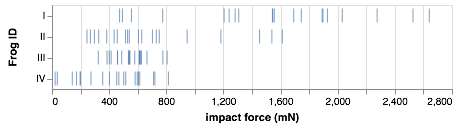

In [6]:
alt.Chart(df
    ).mark_tick(
    ).encode(
        x='impact force (mN):Q',
        y=alt.Y('ID:N', title='Frog ID')
    )

This is a good plot to make since you are **plotting all of your data**, but it does have the problem that you cannot tell if multiple ticks overlap. Let's look at some alternatives.

### Histograms

Histograms are a popular way of displaying repeated measurements. We might want to make a histogram of the impact forces and stack the bars of the histogram so we can see which frogs contributed which portion of the counts of impact forces.

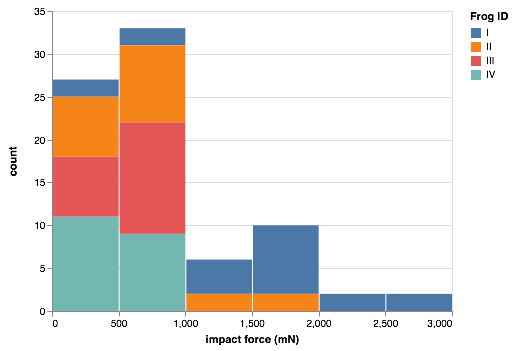

In [7]:
alt.Chart(df
    ).mark_bar(
    ).encode(
        x=alt.X('impact force (mN):Q', bin=True, title='impact force (mN)'),
        y=alt.Y('count()', title='count'),
        color=alt.Color('ID', title='Frog ID')
    )

This is informative, as we see that frog I contributes bigger impacts, and also that the adolescent frogs (frogs III and IV) do not strike with a force greater than one Newton.

## Better alternatives for histograms

Histograms suffer from **binning bias**. By binning the data, you are not plotting all of them. In general, if you can **plot all of your data**. For that reason, I prefer not to use them, but rather to use ECDFs or jitter plots, which enables plotting of all data. As I mentioned before, if you do want to plot summary statistics, box plots are a reasonable alternative.

Unfortunately, Altair is currently lacking in functionality to quickly make box plots, jitter plots, and ECDFs (almost no plotting package does at the moment). The reason for the delay is that the developers are waiting for Vega-Lite to have this capability. Remember, Altair's greatest strength, in my opinion, is its clean and stable grammar. It takes this grammar from Vega/Vega-Lite, and is therefore reliant on those packages and their updates. These features will very likely be in future releases of Altair, as described by Jake VanderPlas, one of Altair's developers, in [this exchange on Twitter](https://twitter.com/cmdline_tips/status/985880890286006273).

<img src="altair_twitter.png" width="400">

The only way to make these kinds of graphics using Altair, is to hack it together using the existing grammar. This is what you would have to do anyway with a lower level plotting package. I wrote a couple functions to make box plots and jitter plots using Altair, and these are available in the `bootcamp_utils` module. Be sure to update the module if you have not already by doing the following on the command line.

    cd ~/git/bootcamp/modules
    git pull upstream master
    pip install -e bootcamp_utils

### Jitter plots

In the strip plot, we plotted all of our data. We can make a similar plot with points instead of ticks. We can control the **opacity** of the marks to help us visualize overlap. This time, we will have the categorical axis (frog ID) on the x-axis.

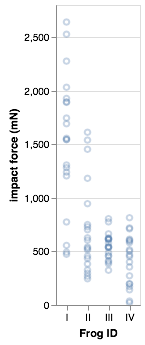

In [8]:
alt.Chart(df
    ).mark_point(
        opacity=0.3
    ).encode(
        x=alt.Y('ID:N', title='Frog ID', axis=alt.Axis(labelAngle=0)),
        y='impact force (mN):Q'
    )

This is nicer, but we sould like to visualize the points more clearly. So, instead of having the points all in one line for each frog, we can instead **jitter** the points in the x-direction by adding some random noise to it. In the grammar of Altair (which is the grammar of Vega/Vega-Lite), this jittering effect is a transform on the data, since we are still plotting against a categorical axis. That is, it is against the grammar to specify x and y positions of each point and then plot them while labeling the axis with a categorical variable like the frog ID. Rather, the jitter is a **transform**, which is part of the specification of the map of the data to its visual representation. Vega/Vega-Lite currently does not have a jitter transformation, though it almost certainly will in the future. This means that Altair does not as well, though it, too, almost certainly will in the future. This also means that we can't properly hack plots using Altair to look like jitter plots, at least not with the axis properly labeled. But, again, this will be coming in the future.

I hacked a temporary solution to this, which is available in the `bootcamp_utils` module. Because I am not plugging into Vega-Lite, but am using Altair, I cannot have the same syntax as Altair when making these plots. The syntax of the function call follows the same logic, though. Let's look at the doc string for the `bootcamp_utils.altair_jitterplot()` function.

In [9]:
bootcamp_utils.altair_jitter?

Signature:
bootcamp_utils.altair_jitter(data=None, encode_x=None, encode_y=None, encode_tooltip=Tooltip({
  
}), height=Undefined, width=Undefined, jitter_width=0.2)
Docstring:
Generate a jitter plot with Altair.

Parameters
----------
data : Pandas DataFrame
    A tidy data frame.
encode_x : str or altair.X instance
    Vega-Lite specification of x-values.
encode_y : str or altair.Y instance
    Vega-Lite specification of y-values.
encode_tooltip : list or altair.Tooltip instance
    Specification for tooltips.
height : float or Undefined (default)
    Height of the chart, in pixels.
width : float or Undefined (default)
    Width of the chart, in pixels.
jitter_width : float
    Maximum jitter distance; must be between 0 and 0.5 to avoid 
    clashes.

Returns
-------
output : Chart
    Altair Chart instance.
File:      ~/Dropbox/git/bootcamp/modules/bootcamp_utils/bootcamp_utils/viz.py
Type:      function


Let's put it to use!

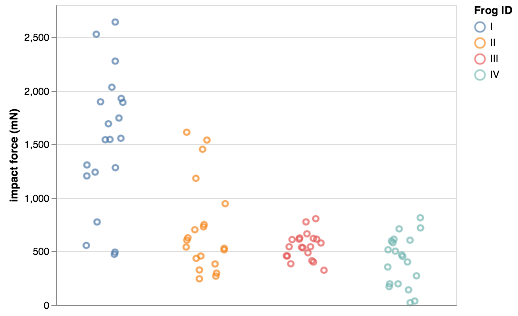

In [10]:
bootcamp_utils.altair_jitter(df,
                             alt.X('ID:N', title='Frog ID'),
                             'impact force (mN):Q',
                             encode_tooltip=['ID', 'adhesive force (mN)'])

This hacked version relies on color and a legend to identify the categories instead of axis labels (because it is illegal to label an axis that has quantitative variables with nominative labels). When we learn about [Bokeh](http://bokeh.pydata.org/), a lower level plotting library, in a future lesson, you will be able to make publication-quality jitter plots.

### Box plots

I will discuss why we need a special function on `bootcamp_utils` to make box plots momentarily, but first, let's make one so that we can see how they look and discuss what they mean.

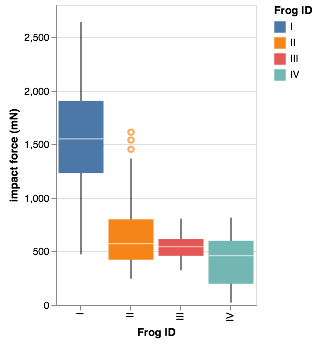

In [11]:
chart = bootcamp_utils.altair_box(df, 
                                  encode_x=alt.X('ID:N', title='Frog ID'),
                                  encode_y='impact force (mN):Q',
                                  encode_color=alt.Color('ID:N', title='Frog ID'))
chart

Box plots provide a summary of the data. The line in the middle of the box is the median and the top and bottom of the box at the 75th and 25th percentiles, respectively. The distance between the 25th and 75th percentiles is called the **interquartile range**, or IQR. The whiskers of the box plot extend a distance equal to 1.5 times the interquartile range, or to the extent of the data, whichever is least extreme. If data points are more extreme, they are shown individually, and are often referred to as outliers.

A box plot can use a useful visualization if you have many data points and it is difficult to plot them all. I rarely find that there are situations where all data cannot be plotted, either with jitter plots of ECDFs, which we will cover in a subsequent lesson, so I generally do not use box plots. Nonetheless, I do not find them too objectionable, as they effectively display important  nonparametric summary statistics of your data set.

So, why does Altair not have built in box plots? Because it is not yet in the grammar. Rather, in Altair, box plots are constructed by overlaying the different components of the box plot, as shown in the [example in the Altair docs](https://altair-viz.github.io/gallery/boxplot_max_min.html). The function I wrote just automates this process.

At this point, I note that the charts produced by `bootcamp_utils.altair_box()` and `bootcamp_utils.altair_jitter()` can be further configured using the `configure_*()` method. So, we might want the strings for the frog ID's to be horizontal (the Altair default for categorical labels on the x-axis is rotated 90 degrees) and for the points of the outliers to be filled.

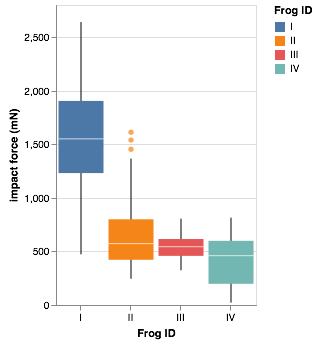

In [12]:
chart.configure_axisX(labelAngle=0).configure_point(filled=True)

### Bar charts

At this point, you may be asking if you can make bar graphs. This is a common type of plot in the biological literature. We can make this with Altair. But before I even begin this, I will give you the following piece of advice: *Don't make bar graphs.* More on that in a moment. For now, here is a bar graph.

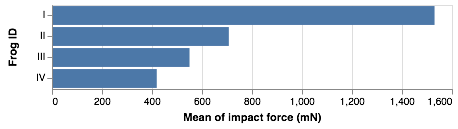

In [13]:
alt.Chart(df
    ).mark_bar(
    ).encode(
        x='mean(impact force (mN)):Q',
        y=alt.Y('ID:N', title='Frog ID'))

Notice that we were able to cleverly put a `mean` function into the string specifying the `x` encoding channel. There are several functions we can use there. However, I do not advise doing this. Rather, use Pandas to get yourself a `DataFrame` with whatever summary statistics you want to use, and then pass that to Altair. This enables you to have more explicit control over any statistical modeling you do. You should do this in general, not just for bar graphs (which you shouldn't be making anyway). Here is how you can do that, this time including a standard error of the mean calculation.

In [14]:
# Make data frame with means and standard error of mean
df_summary = (df.groupby('ID')['impact force (mN)']
                .agg(['mean', 'sem'])
                .reset_index())

Let's take a quick look at this summary DataFrame.

In [15]:
df_summary

,ID,mean,sem
0,I,1530.20,140.918782
1,II,707.35,94.937466
2,III,550.10,27.788477
3,IV,419.10,52.517260


We can use the `sem` column to add error bars.

In [16]:
# Add error bars to df_summary
df_summary['error_low'] = df_summary['mean'] - 1.96*df_summary['sem']
df_summary['error_high'] = df_summary['mean'] + 1.96*df_summary['sem']

# Take another look
df_summary

,ID,mean,sem,error_low,error_high
0,I,1530.20,140.918782,1253.999187,1806.400813
1,II,707.35,94.937466,521.272566,893.427434
2,III,550.10,27.788477,495.634584,604.565416
3,IV,419.10,52.517260,316.166170,522.033830


This tidy `DataFrame` can now be used to make the plot of the bar graph and can overlay the error bars.

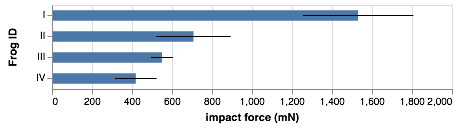

In [17]:
# Make a bar graph
bars = alt.Chart(df_summary
    ).mark_bar(
    ).encode(
        x=alt.X('mean:Q', title='impact force (mN)'),
        y=alt.Y('ID:N', title='Frog ID'))

# Make the error bars
error_bars = alt.Chart(df_summary
    ).mark_rule(
    ).encode(
        x='error_low:Q',
        x2='error_high:Q',
        y=alt.Y('ID:N', title='Frog ID'))

# Overlay
chart = bars + error_bars

# Thin the bars a bit
chart.configure_scale(bandPaddingInner=0.5)

Did you see that? To overlay plots, we just use the `+` operator in Altair! **So** convenient!

So, this exercise in bar graphs with error bars just allowed you to learn about overlays in Altair. But I cannot stress this enough: Do not ever make a plot like this. There are so many reasons why. You are not plotting all of your data, and overlaying error bars computed from standard error of the mean implicitly assumes a statistical model (which is almost always not a good one). **Please**, I implore you, do not make bar graphs with error bars, and, in general....

### Don't make bar graphs

Bar graphs, especially with error bars, are typically awful. They are pervasive in biology papers. I have yet to find a single example where a bar graph is the best choice. Jitter plots or even box plots, are more informative and almost always preferred. In fact, ECDFs (those wonderful things I keep mentioning that we will soon get to in upcoming lessons) are often better even than these. Whether you use jitter plots or ECDFs, here is a simple message:

<div class="alert alert-danger">
<center>Don't make bar graphs.</center>
</div>

What should I do instead you ask? The answer is simple: plot all of your data when you can. If you can't, box plots are always better than bar graphs.